<a href="https://colab.research.google.com/github/MuskanBansal20/ImageclassificationCIFAR-10/blob/master/CIFAR_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/"

'A2305218448_Muskan Bansal.pdf'
 Assignment_bee.pdf
'BFS&DFS.C'
' CIFAR_10 Classification.ipynb'
'Copy of  CIFAR_10 Classification.ipynb'
'Deep Learning'
 Dl.pdf
 gui.ipynb
 IMG-20190513-WA0008.jpg
 KRUSKAL.C
 Muskan_bansal3%.pdf
'NTCC Samples, Guidelines and Free Resources | Aminotes'
 PRIM.C
 TermPaperDL.pdf
 Untitled0.ipynb


In [ ]:
import numpy as np 
np.random.seed(123) # for reproducibility
from tensorflow import keras  
from tensorflow.keras.models import Sequential  # one stack after other model  
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten  # core layers 
from tensorflow.keras.layers import Convolution2D, MaxPooling2D  #cnn layers  
from keras.utils import np_utils  # utilities  
from tensorflow.keras import backend as K    
from keras.datasets import cifar10

Using TensorFlow backend.


In [ ]:
(x_train, y_train),(x_test,y_test1)= cifar10.load_data()  # print train set size (60000, 28,28)
print(x_train.shape)
print(y_train.shape,x_test.shape,y_test1.shape
     )

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1) (10000, 32, 32, 3) (10000, 1)


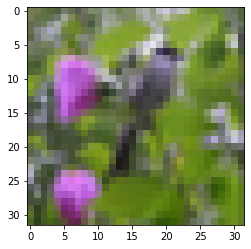

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[300],cmap='gray',interpolation='nearest')   

In [ ]:
### PRE PROCESSING OF DATA  
# reshape input data : add its depth also   
# x_train=x_train.reshape(x_train.shape[0],32,32,1)   
# x_test=x_test.reshape(x_test.shape[0],32,32,1)   
# print(x_train.shape) 
# convert datatype and normalize values   
x_train=x_train.astype('float32')  
x_test=x_test.astype('float32')  
x_train/=255; x_test/=255

In [ ]:
### PRE PROCESSING OF CLASS LABELS FOR KERAs
print(y_train.shape) # (60000,) : seems like data is not distributed label wise as their are not 10 diff. classes  
y_train=y_train.reshape(y_train.shape[0])
y_test1=y_test1.reshape(y_test1.shape[0])
print(y_train[:10])  # printing first 10 labels of data   
# catagorizing labels   
y_train=np_utils.to_categorical(y_train,10)
print(y_train[:10])
y_test=np_utils.to_categorical(y_test1,10)   
print(y_train.shape)   


(50000, 1)
[6 9 9 4 1 1 2 7 8 3]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
(50000, 10)


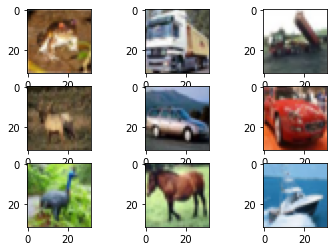

In [ ]:
for i in range(9):   
  plt.subplot(3,3,i+1)   
  plt.imshow(x_train[i],cmap='gray')   
  plt.axis('on')

In [ ]:
### DEFINE MODEL ARCHITECTURE  
# declare sequential model   
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Convolution2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Convolution2D(128, (3, 3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6507 - accuracy: 0.3870
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2009 - accuracy: 0.5704
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9999 - accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8802 - accuracy: 0.6921
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8062 - accuracy: 0.7170
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7514 - accuracy: 0.7365
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7036 - accuracy: 0.7544
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6723 - accuracy: 0.7634
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6527 - accuracy: 0.7719
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.627

In [ ]:
sce = model.evaluate(x_test, y_test, verbose=0)   
print('test score: ', sce[0])   
print ('test accuracy : ', sce[1])

test score:  0.7229113578796387
test accuracy :  0.7578999996185303


In [ ]:
cifar10_classes=["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
res=model.predict_classes(x_test[:9])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


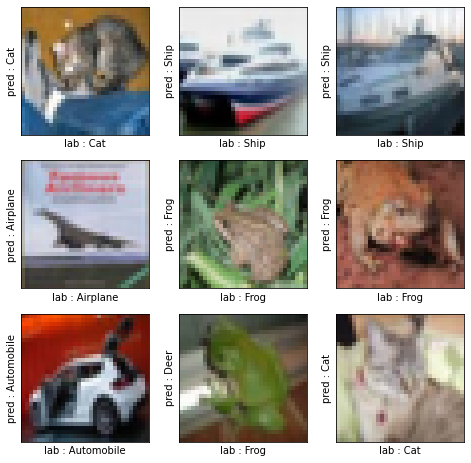

In [ ]:
plt.figure(figsize=(8,8))   
for i in range(9):   
  plt.subplot(3,3,i+1)   
  plt.imshow(x_test[i], cmap='gray')   
  plt.gca().get_xaxis().set_ticks([])   
  plt.gca().get_yaxis().set_ticks([])
  plt.ylabel('pred : %s' %cifar10_classes[res[i]], fontsize=10)
  plt.xlabel('lab : %s' %cifar10_classes[y_test1[i]], fontsize=10)
 



array([8])

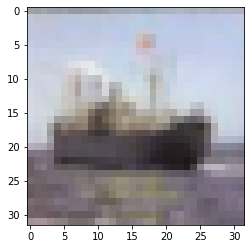

In [ ]:
plt.imshow(x_test[712,:,:,:])
model.predict_classes(x_test[712].reshape(1,32,32,3))



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(32,32))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)

print(classes)

classes2=np.argmax(classes,axis=1)

if classes2[0]==0:
  print('Aeroplane')
elif classes2[0]==1:
    print('Automobile')
elif classes2[0]==2:
    print('bird')
elif classes2[0]==3:
    print('cat')
elif classes2[0]==4:
    print('deer')
elif classes2[0]==5:
    print('dog')
elif classes2[0]==6:
    print('frog')
elif classes2[0]==7:
    print('horse')
elif classes2[0]==8:
      print('ship')
elif classes2[0]==9:
      print('Truck')
else:
      print('cant regognize')
print('done')
    


Saving aeroplane.jpg to aeroplane.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Aeroplane
done
